In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import LinearRegression as lreg

df = pd.read_csv("housing.csv")

display(df.shape)
display(df.head())
display(df.describe())
display(df.info())

(20640, 10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [35]:
print(df.isna().sum())
df_clean = df.dropna()
print(df_clean.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [14]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [15]:
ocean_proxValues = list(df["ocean_proximity"].unique())

for ocean in ocean_proxValues:
    values = df.loc[df["ocean_proximity"] == ocean, ["median_house_value"]]
    mean = values.mean().iloc[0]
    print(f"{ocean} mean: {mean:.4f}")

NEAR BAY mean: 259212.3118
<1H OCEAN mean: 240084.2855
INLAND mean: 124805.3920
NEAR OCEAN mean: 249433.9774
ISLAND mean: 380440.0000


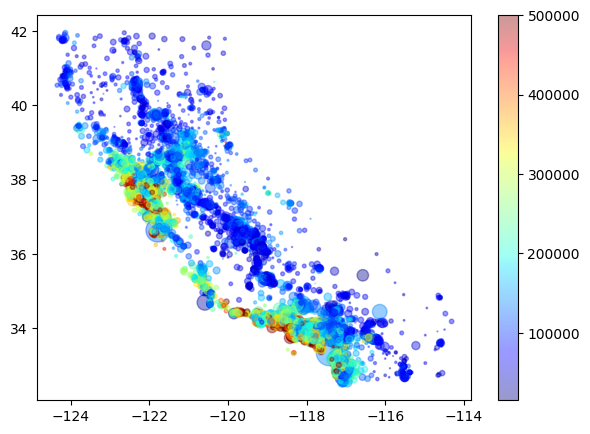

In [16]:
from matplotlib import colormaps

plt.figure(figsize=(7,5))
plt.scatter(df["longitude"], 
            df["latitude"], 
            s=df["population"]/100, 
            alpha=0.4, 
            c=df["median_house_value"],
            cmap="jet"
            )
plt.colorbar()

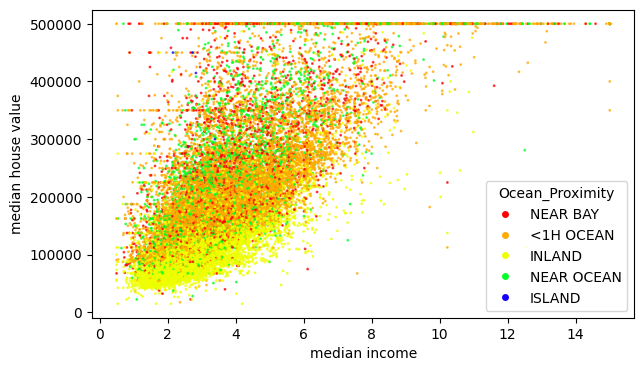

In [17]:
from matplotlib.lines import Line2D

colors = ["#ff0000", "#ffaa00", "#eeff00", "#00ff26", "#1500ff"]
cmap = {lable : col for lable, col in zip(ocean_proxValues, colors)}
plt.figure(figsize=(7,4))
plt.scatter(df["median_income"], df["median_house_value"], s=1, alpha=.7, c=df["ocean_proximity"].map(cmap))
plt.xlabel("median income")
plt.ylabel("median house value")

legend_elements = [Line2D([0], [0], marker="o", color="w", label=label, markerfacecolor=color, markersize=6) for label, color in cmap.items()]

plt.legend(handles=legend_elements, title= "Ocean_Proximity", loc="best")

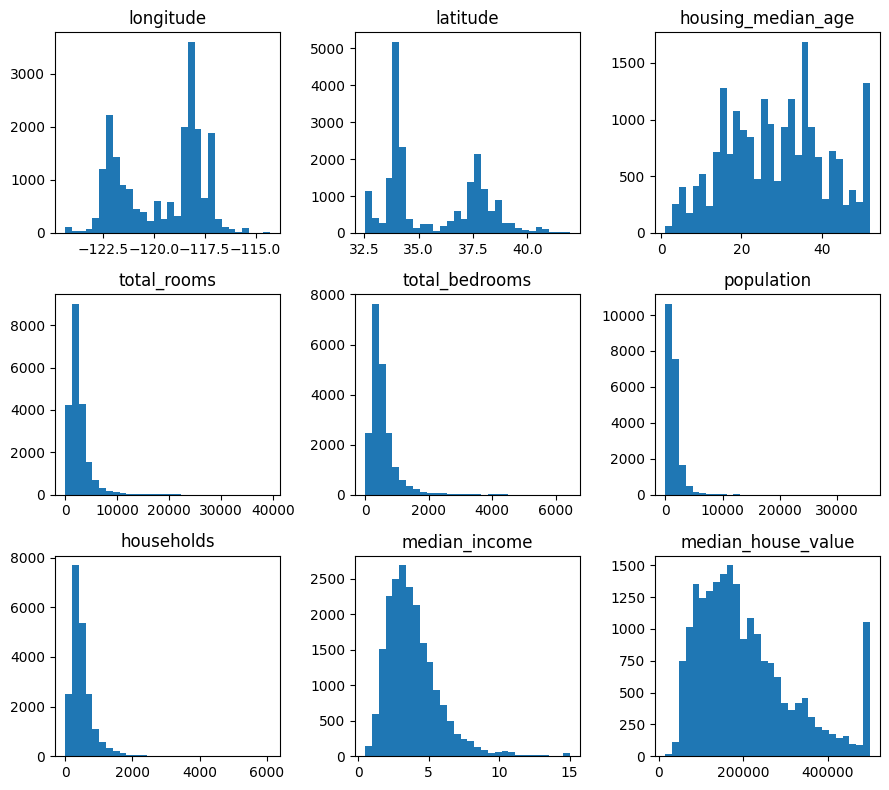

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(9,8), dpi=100)

rows = [df.columns[:3], df.columns[3:6], df.columns[6:9]]

for r, col in enumerate(rows):
    for c, x in enumerate(col):
        ax[r, c].hist(df[x], bins= 30)
        ax[r, c].set_title(x)

    plt.tight_layout()
        


In [37]:
traind, testd = lreg.train_test_split(df_clean)
model = lreg.LinearRegression()
train_X = lreg.make_numeric(traind[:,:-2])
train_y = lreg.make_numeric(traind[:,-2])
train_categorical = traind[:,-1]

model.fit(train_X, train_y)
print(train_X.dtype)

print(f"{model.b}, {model.intercept}")
#prediction = model.predict(testd)
#prediction
print(train_X)
print("Y:",train_y)

AttributeError: module 'LinearRegression' has no attribute 'make_numeric'